In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline 
from sklearn.metrics import roc_curve, auc

In [2]:
# Загружаем датасет
df = pd.read_csv('S05-hw-dataset.csv')

# Выводим первые 5 строк данных
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [3]:
# Получаем информацию о столбцах и типах данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [4]:
# Выводим базовые описательные статистики для числовых признаков
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [5]:
# Анализируем распределение целевого признака default
target_distribution = df['default'].value_counts(normalize=True) * 100
target_distribution

default
0    58.966667
1    41.033333
Name: proportion, dtype: float64

In [6]:
# Краткие выводы по первичному анализу
#1. В датасете 3000 объектов (клиентов) и 17 признаков.
#2. Все признаки числовые, пропусков данных нет.
#3. Целевой признак 'default' распределен следующим образом:
#   - Класс 0 (нет дефолта): примерно 58.9%
#   - Класс 1 (дефолт): примерно 41%
#   Это говорит о том, что классы не идеально сбалансированы, но и не сильно перекошены.

In [7]:
# Выделяем матрицу признаков X и вектор таргета y
X = df.drop(columns=['client_id', 'default'])
y = df['default']

print(f"Размер матрицы признаков X: {X.shape}")
print(f"Размер вектора таргета y: {y.shape}")

Размер матрицы признаков X: (3000, 15)
Размер вектора таргета y: (3000,)


In [8]:
# Проверяем диапазон признака debt_to_income
if 'debt_to_income' in X.columns:
    debt_min = X['debt_to_income'].min()
    debt_max = X['debt_to_income'].max()
    print(f"Диапазон debt_to_income: [{debt_min:.4f}, {debt_max:.4f}]")

Диапазон debt_to_income: [0.0061, 0.8783]


In [9]:
# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25,  # 25% данных на тест
    random_state=42,  # Фиксируем random_state для воспроизводимости
    stratify=y
)

print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

# Проверяем распределение классов в обучающей и тестовой выборках
print("\nРаспределение классов в обучающей выборке:")
print((y_train.value_counts(normalize=True) * 100).round(2))
print("\nРаспределение классов в тестовой выборке:")
print((y_test.value_counts(normalize=True) * 100).round(2))

Размер обучающей выборки: 2250
Размер тестовой выборки: 750

Распределение классов в обучающей выборке:
default
0    58.98
1    41.02
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
default
0    58.93
1    41.07
Name: proportion, dtype: float64


In [10]:
# Строим бейзлайн-модель на основе DummyClassifier
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)

# Получаем предсказания
y_pred_dummy = dummy_clf.predict(X_test)
y_proba_dummy = dummy_clf.predict_proba(X_test)[:, 1]  # Вероятности для класса 1

# Оцениваем качество модели
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_roc_auc = roc_auc_score(y_test, y_proba_dummy)

print(f"accuracy: {dummy_accuracy:.4f}")
print(f"ROC-AUC: {dummy_roc_auc:.4f}")

accuracy: 0.5400
ROC-AUC: 0.5246


In [11]:
# Комментарий к результатам бейзлайн-модели
#Бейзлайн-модель показывает:
#- accuracy: 0.5400
#- ROC-AUC: 0.5246
#
#Эта модель просто генерирует предсказания случайно, в соответствии с распределением классов в обучающих данных.
#ROC-AUC около 0.5 означает, что модель работает примерно как случайное угадывание.
#Точность около 0.54 соответствует доле самого частого класса.
#
#Этот результат важен, так как он задает базовый уровень качества, который любая осмысленная модель должна превзойти.
#Наша цель - построить модель, которая будет показывать лучшие метрики по сравнению с этим бейзлайном.

In [12]:
# Создаем pipeline с предобработкой и логистической регрессией
# Создаем базовый pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # стандартизация признаков
    ('logreg', LogisticRegression(max_iter=1000, random_state=42))  # логистическая регрессия
])

# Обучаем модель на обучающей выборке
pipe.fit(X_train, y_train)

# Делаем предсказания на тестовой выборке
y_pred_logreg = pipe.predict(X_test)
y_proba_logreg = pipe.predict_proba(X_test)[:, 1]  # вероятности для класса 1

# Оцениваем качество модели
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
logreg_roc_auc = roc_auc_score(y_test, y_proba_logreg)

print(f"Точность (accuracy) логистической регрессии: {logreg_accuracy:.4f}")
print(f"ROC-AUC логистической регрессии: {logreg_roc_auc:.4f}")

Точность (accuracy) логистической регрессии: 0.7933
ROC-AUC логистической регрессии: 0.8647


In [13]:
from sklearn.model_selection import GridSearchCV
# Определяем сетку гиперпараметров
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'logreg__penalty': ['l2']  # используем L2-регуляризацию (по умолчанию)
}

# Создаем GridSearchCV
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,  # 5 фолдов для кросс-валидации
    scoring='roc_auc',  # оптимизируем по ROC-AUC
    n_jobs=-1,  # использовать все ядра процессора
    verbose=1
)

# Запускаем поиск лучших параметров
grid_search.fit(X_train, y_train)

# Выводим лучшие параметры и результаты
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучший ROC-AUC: {grid_search.best_score_:.4f}")

# Получаем лучшую модель
best_pipe = grid_search.best_estimator_

# Делаем предсказания лучшей моделью
y_pred_best = best_pipe.predict(X_test)
y_proba_best = best_pipe.predict_proba(X_test)[:, 1]

# Оцениваем качество лучшей модели
best_accuracy = accuracy_score(y_test, y_pred_best)
best_roc_auc = roc_auc_score(y_test, y_proba_best)

print(f"\naccuracy: {best_accuracy:.4f}")
print(f"ROC-AUC: {best_roc_auc:.4f}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Лучшие параметры: {'logreg__C': 1.0, 'logreg__penalty': 'l2'}
Лучший ROC-AUC: 0.8632

accuracy: 0.7933
ROC-AUC: 0.8647


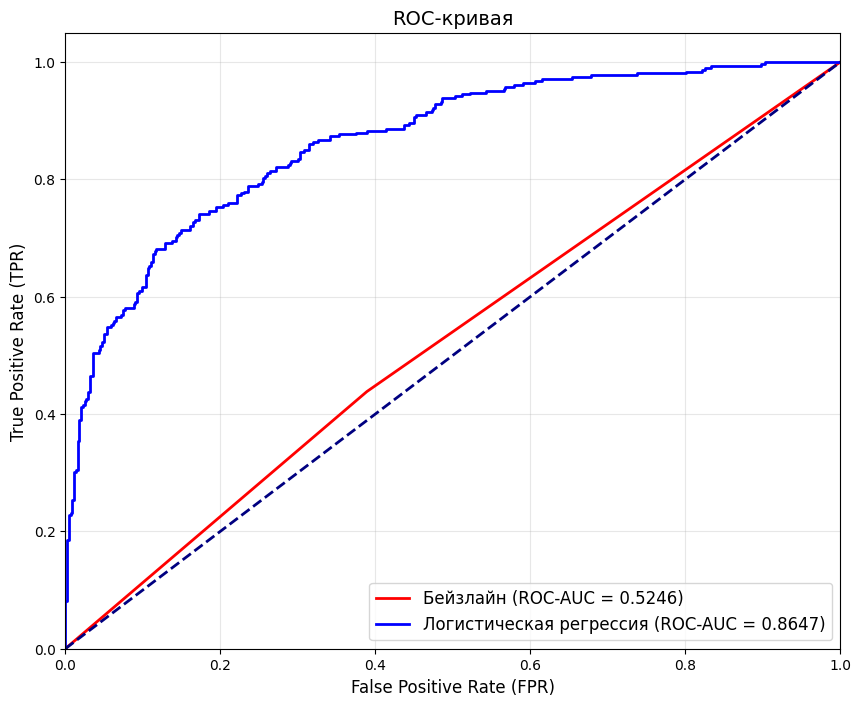

In [14]:
# Вычисляем ROC-кривую для бейзлайна
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_proba_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Вычисляем ROC-кривую для логистической регрессии
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_best)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Строим график
plt.figure(figsize=(10, 8))
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, label=f'Бейзлайн (ROC-AUC = {roc_auc_dummy:.4f})')
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label=f'Логистическая регрессия (ROC-AUC = {roc_auc_logreg:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC-кривая', fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.savefig('figures/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Сравнение метрик в табличной форме
results = pd.DataFrame({
    'Модель': ['DummyClassifier (бейзлайн)', 'LogisticRegression (лучшая)'],
    'Accuracy': [dummy_accuracy, best_accuracy],
    'ROC-AUC': [dummy_roc_auc, best_roc_auc],
})

print("Сравнение моделей по метрикам:")
display(results.style.highlight_max(axis=0, subset=['Accuracy', 'ROC-AUC']))

Сравнение моделей по метрикам:


,Модель,Accuracy,ROC-AUC
0,DummyClassifier (бейзлайн),0.540000,0.524586
1,LogisticRegression (лучшая),0.793333,0.864709


In [16]:
# Краткий текстовый отчет
#Анализ результатов:
#
#1. Сравнение качества моделей:
#   - Бейзлайн-модель (DummyClassifier) показала ROC-AUC = 0.52, что соответствует случайному угадыванию. 
#     accuracy = 0.54 соответствует доле наиболее частого класса.
#   - Логистическая регрессия значительно превзошла бейзлайн: ROC-AUC вырос до 0.86, а точность до 0.79.
#     Это означает, что наша модель действительно извлекает полезную информацию из признаков.
#
#2. Влияние регуляризации:
#   - При подборе гиперпараметра C наблюдалось улучшение качества
#     при увеличении C до определенного значения. Оптимальное значение C = 1.0 показало лучший баланс
#     между обобщающей способностью и подстройкой под данные.
#
#3. Выводы:
#   - Логистическая регрессия показала хорошие результаты и является разумным выбором для этой задачи.
#   - Модель обучилась выявлять сложные закономерности в данных, значительно превзойдя случайное угадывание.
#   - Для дальнейшего улучшения можно рассмотреть генерацию новых признаков или использование более сложных моделей,
#     но для первого приближения логистическая регрессия дает удовлетворительные результаты.